# Análise da base WILT

Disciplina: Aprendizagem de máquina supervisionada
Docente: Leandro Almeida
Discentes:
1.   Frederico Bezerra
2.   Wladimir Farias
3.   Ygor Alcantara


A base de dados sobre a cor das árvores para identificar se a árvore esta doente ou saudável. 

Para este exercício utilizaremos as fases do CRISP-DM
Que são: 


1.   Compreensão do negócio
2.   Compreensão de dados
3.   Preparação de dados
4.   Modelagem
5.   Avaliação
6.   Implantação


fonte: https://archive.ics.uci.edu/ml/datasets/Wilt

# Compreensão do negócio

O presente trabalho busca identificar se a árvore Pinheiro (Pinus sylvestris, ou Pinheiro escorês) está com a doença "Pine Wilt" (murcha do pinheiro) que é causada por um Nemátodo (Bursaphelenchus xylophilus).

Os nematoides se alimentam da resina do pinheiro e por isso começam a obstruir e interromper os ductos ocasionando a falha na condução da água fazendo com que ele murche rápidamente.

As folhas murchas ficam vermelho-marron enquanto as folhas saudáveis são verdes e a partir desde ponto que nosso trabalho ocorre. 

Informações coletadas por meio de uma Câmera Pancromática e Multiespectral (PAN) são os  atributos que descrevem se a árvore está saudável ou não, e apresenta informações das cores verde e vermelho.


# Compreensão dos dados


**Vamos tentar explicar os atributos:**



> Class: É variável Dependente é a que afirma se a árvore esta doente (w) ou se nâo esta (n).

> GLCM_Pan: É a textura média GLCM (banda Pan) - Gray level co-occurrence matrix 
ou seja, é como se comporta a imagem após processo de binarização da imagem (preto, braco e cinzas) a partir de imagens com resolução baixa 

> SD_Pan: A partir da medida da da banda pan é calculado seu desvio padrão. Standard deviation (Pan band).

> Mean_G: É a concentração da cor verde na imagem a partir de uma análise de histograma.


> Mean_R: É a concentração da cor vermelha na imagem a partir de uma análise de histograma.


> Mean_NIR: é o valor médio de NIR - “near infrared spectroscopy" que é o resultado de uma medição da radiação eletromagnética com comprimento
de onda entre 800 e 2.400 nm (nanometros)





In [ ]:
#Attribute Information:
#class: 'w' (diseased trees), 'n' (all other land cover)
#GLCM_Pan: GLCM mean texture (Pan band) textura média GLCM (banda Pan)
#Mean_G: Mean green value Valor médio verde
#Mean_R: Mean red value valor vermelho médio
#Mean_NIR: Mean NIR value valor médio de NIR
#SD_Pan: Standard deviation (Pan band) Desvio padrão (banda Pan)

# Preparação de dados

In [ ]:
#subindo as principais bibliotecas 

import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt 

!pip install neupy
from neupy import algorithms

#import warnings
#warnings.filterwarnings("ignore")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
plt.rcParams['figure.figsize'] = [16, 10]


In [ ]:
!pip install dataprep #instalando o dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DataPrep Report
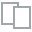
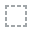
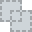
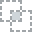
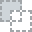
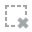
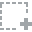
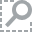
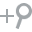
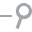
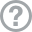
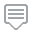
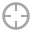
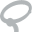
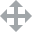
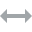
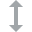
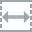
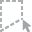
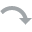
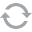
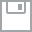
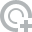
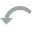
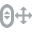
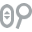
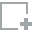
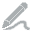
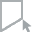
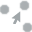
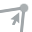
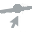

In [ ]:
from dataprep.eda import create_report
df1 = pd.read_csv("training.csv")
create_report(df1)

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# load wilt dataset
df_training = pd.read_csv("training.csv", delimiter=",")
print(df_training.shape)

df_testing = pd.read_csv("testing.csv", delimiter=",")
print(df_testing.shape)

(4339, 6)
(500, 6)


In [ ]:
df_training.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444
75%,135.043591,241.791304,116.866071,643.087037,29.899148
max,183.281250,955.714286,746.333333,1005.516129,156.508431


In [ ]:
print(df_training.head(2))

df_training['class'].replace(to_replace=['w','n'], value=[1,0],inplace=True)
print('------------------------------------------')
print(df_training.head(2))

  class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
0     w  120.362774       205.5  119.395349  416.581395  20.676318
1     w  124.739583       202.8  115.333333  354.333333  16.707151
------------------------------------------
   class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
0      1  120.362774       205.5  119.395349  416.581395  20.676318
1      1  124.739583       202.8  115.333333  354.333333  16.707151


In [ ]:
df_testing.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,127.065977,209.767564,107.739215,453.734870,20.641288
std,10.667542,78.677763,71.773037,156.198323,6.757322
min,81.125000,117.210526,50.578947,144.875817,5.772400
25%,119.978475,188.892662,85.511304,341.588922,15.853416
50%,127.532191,203.626923,99.828421,443.719444,20.028992
75%,133.799711,218.965116,118.054555,542.959928,24.121108
max,167.944444,1848.916667,1594.583333,1597.333333,62.396581


In [ ]:
print(df_testing.head(2))

df_testing['class'].replace(to_replace=['w','n'], value=[1,0],inplace=True)
print('------------------------------------------')
print(df_testing.head(2))

  class    GLCM_pan  Mean_Green   Mean_Red    Mean_NIR     SD_pan
0     n  109.828571  183.700000  82.950000  251.750000  16.079412
1     n  130.284483  212.637931  96.896552  482.396552  21.210295
------------------------------------------
   class    GLCM_pan  Mean_Green   Mean_Red    Mean_NIR     SD_pan
0      0  109.828571  183.700000  82.950000  251.750000  16.079412
1      0  130.284483  212.637931  96.896552  482.396552  21.210295


In [ ]:
print(df_testing.dtypes)
print('------------------------------------------')
print(df_training.dtypes)

class           int64
GLCM_pan      float64
Mean_Green    float64
Mean_Red      float64
Mean_NIR      float64
SD_pan        float64
dtype: object
------------------------------------------
class           int64
GLCM_pan      float64
Mean_Green    float64
Mean_Red      float64
Mean_NIR      float64
SD_pan        float64
dtype: object


In [ ]:
df_testing.corr()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
class,1.000000,0.017013,-0.034588,0.088081,-0.016720,-0.039189
GLCM_pan,0.017013,1.000000,-0.033869,-0.029485,0.014228,-0.080338
Mean_Green,-0.034588,-0.033869,1.000000,0.983604,0.471186,0.039028
Mean_Red,0.088081,-0.029485,0.983604,1.000000,0.407273,-0.002530
Mean_NIR,-0.016720,0.014228,0.471186,0.407273,1.000000,0.365315
SD_pan,-0.039189,-0.080338,0.039028,-0.002530,0.365315,1.000000


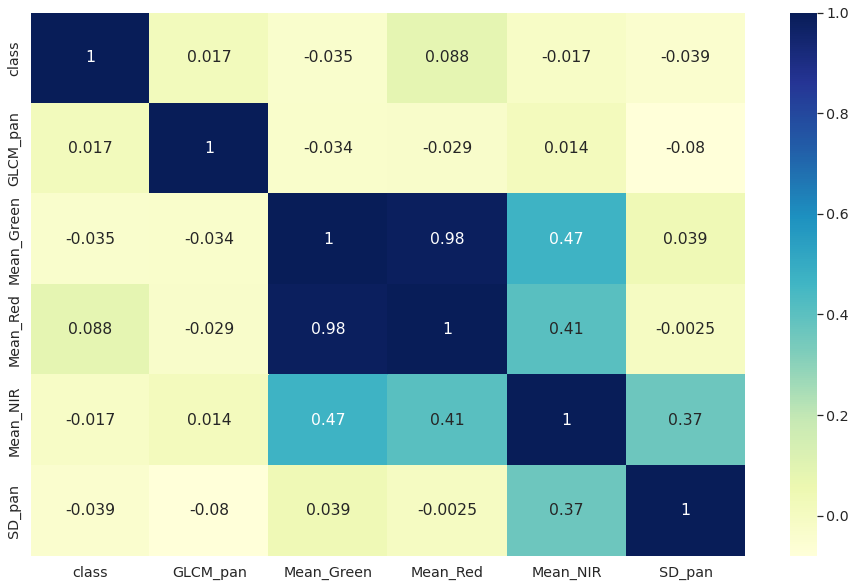

In [ ]:
sns.heatmap(df_testing.corr(), annot=True, cmap='YlGnBu')

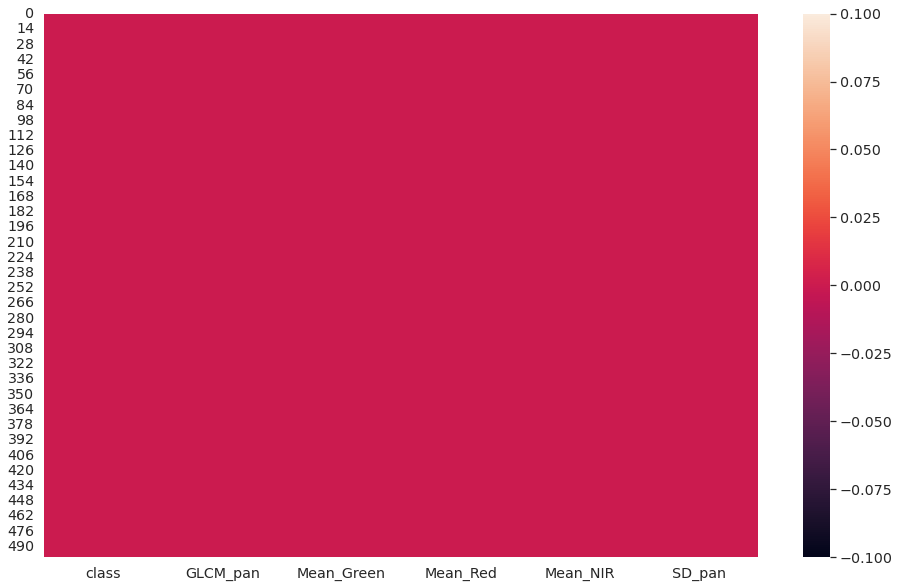

In [ ]:
sns.heatmap(df_testing.isna())

In [ ]:
df_training.corr()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
class,1.000000,0.017804,-0.067359,0.001844,-0.099268,-0.054946
GLCM_pan,0.017804,1.000000,-0.122384,-0.107166,-0.094263,-0.065023
Mean_Green,-0.067359,-0.122384,1.000000,0.964682,0.223518,0.246103
Mean_Red,0.001844,-0.107166,0.964682,1.000000,0.121230,0.254383
Mean_NIR,-0.099268,-0.094263,0.223518,0.121230,1.000000,0.120276
SD_pan,-0.054946,-0.065023,0.246103,0.254383,0.120276,1.000000


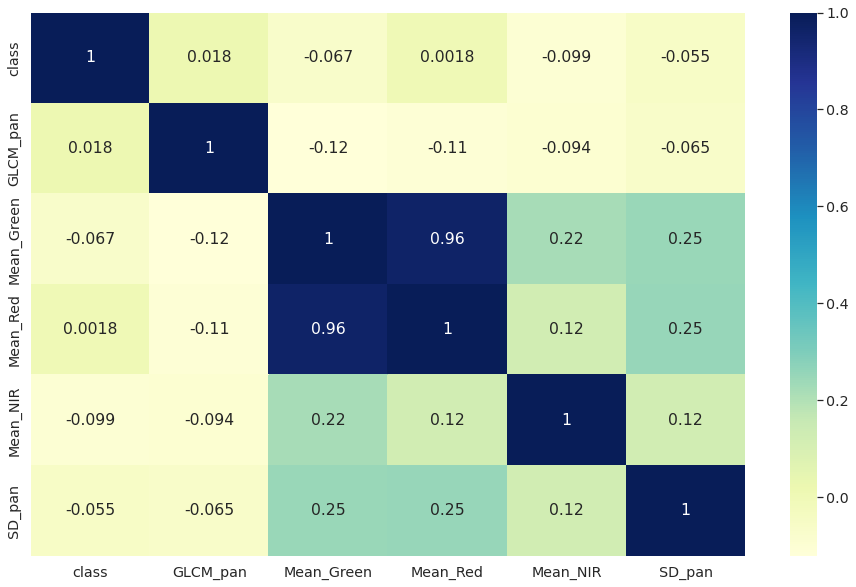

In [ ]:
sns.heatmap(df_training.corr(), annot=True, cmap='YlGnBu')

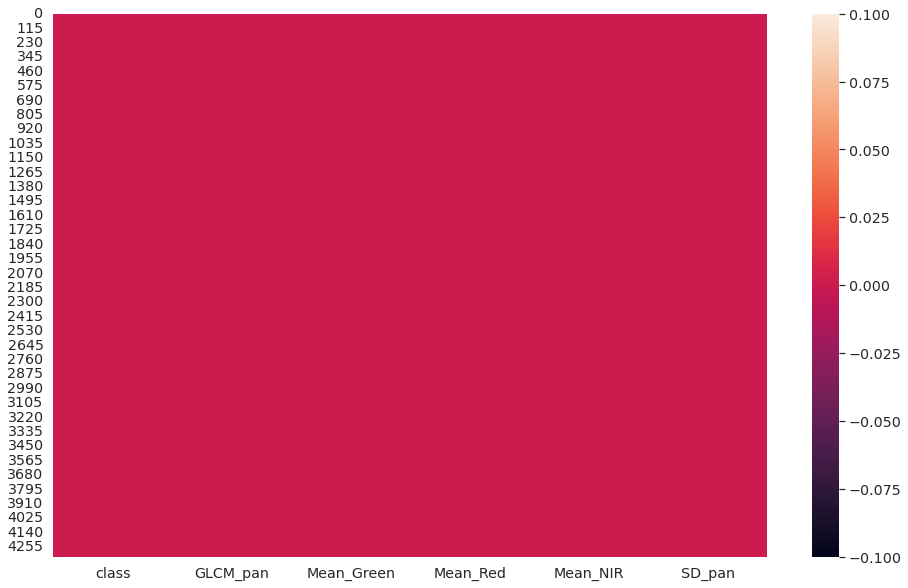

In [ ]:
sns.heatmap(df_training.isna())

Data Analyzing:

In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   int64  
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 203.5 KB


In [ ]:
df_training.isnull().sum()


class         0
GLCM_pan      0
Mean_Green    0
Mean_Red      0
Mean_NIR      0
SD_pan        0
dtype: int64

In [ ]:
pd.DataFrame(df_training['class'].value_counts())



,class
0,4265
1,74


In [ ]:
pd.DataFrame(df_testing['class'].value_counts())

,class
0,313
1,187


In [ ]:
#over sample 
#under sample

In [ ]:
df_training.duplicated().sum()


14

In [ ]:
df_testing.duplicated().sum()

4

#Plotting and Visualization


In [ ]:
GLCM=df_training.GLCM_pan.values
Green=df_training.Mean_Green.values
Red=df_training.Mean_Red.values
NIR=df_training.Mean_NIR.values
pan=df_training.SD_pan.values

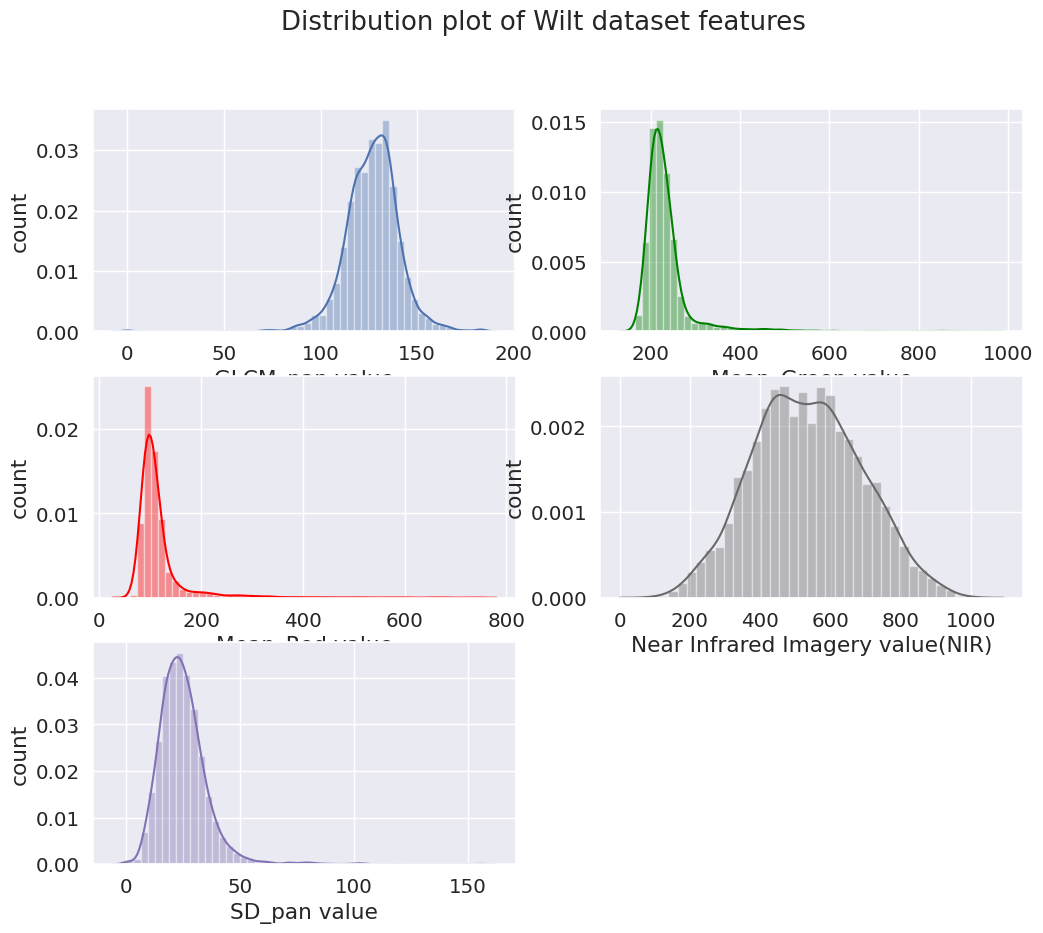

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10),dpi=100)
plt.suptitle('Distribution plot of Wilt dataset features')


plt.subplot(3,2,1)
sns.distplot(GLCM)
plt.xlabel('GLCM_pan value')
plt.ylabel('count')

plt.subplot(3,2,2)
sns.distplot(Green,color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(3,2,3)
sns.distplot(Red,color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(3,2,4)
sns.distplot(NIR,color='dimgray')
plt.xlabel('Near Infrared Imagery value(NIR)')
plt.ylabel('count')

plt.subplot(3,2,5)
sns.distplot(pan,color='m')
plt.xlabel('SD_pan value')
plt.ylabel('count');

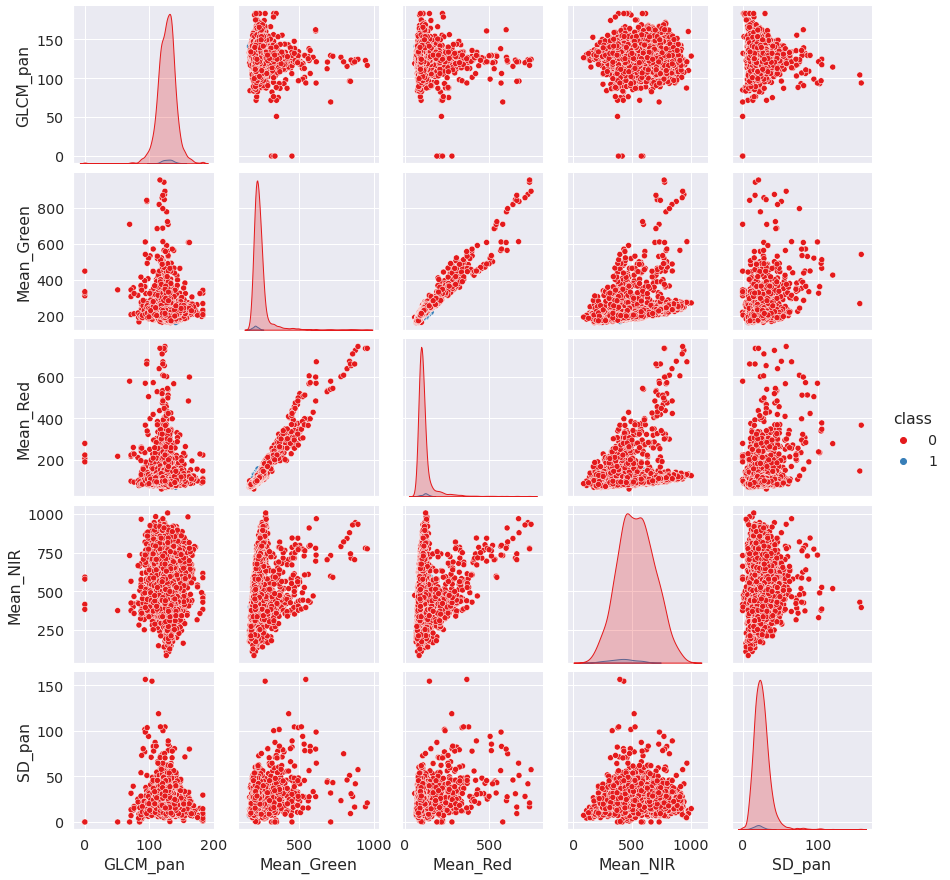

In [ ]:
sns.set(font='sans-serif', font_scale=1.3)
sns.pairplot(df_training,hue='class',palette="Set1");

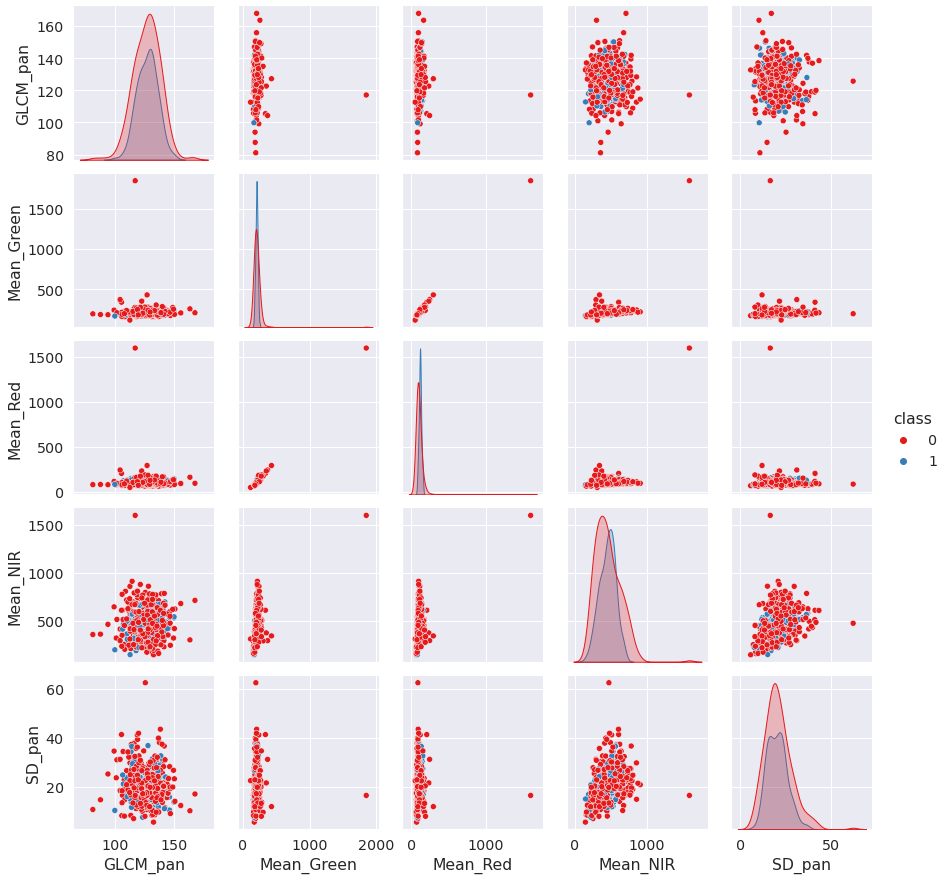

In [ ]:
sns.set(font='sans-serif', font_scale=1.3)
sns.pairplot(df_testing,hue='class',palette="Set1");

# Juntando as bases

In [ ]:
test = pd.read_csv("testing.csv")
trai = pd.read_csv("training.csv")


In [ ]:
m = pd.merge(test, trai, how = 'outer')



In [ ]:
test.shape

(500, 6)

In [ ]:
trai.shape

(4339, 6)

In [ ]:
m.shape

(4837, 6)

# KNN

In [ ]:
#renomeando o dataset para reaproveitar pedaços de código          
#dataset = pd.read_csv("training.csv")
dataset = m

In [ ]:
print("Primeiros dados")
dataset['class'].replace(to_replace=['w','n'], value=[1,0],inplace=True)



Primeiros dados


In [ ]:
print(dataset)

        GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan  class
0     109.828571  183.700000   82.950000  251.750000  16.079412      0
1     130.284483  212.637931   96.896552  482.396552  21.210295      0
2     131.386555  185.466667   85.466667  419.666667  13.339998      0
3     141.345098  180.875000   81.500000  348.062500  18.213577      0
4     121.383408  218.357143  112.017857  426.607143  19.083196      1
...          ...         ...         ...         ...        ...    ...
4832  111.568773  203.588235   93.264706  403.735294  26.512777      0
4833  125.435240  206.394161   93.058394  512.270073  33.466060      0
4834  132.123859  465.343750  295.333333  499.250000  38.762967      0
4835  124.469536  215.152632   98.484211  675.915789  28.506542      0
4836  125.171928  559.048000  365.968000  439.272000  15.392322      0

[4801 rows x 6 columns]


In [ ]:
dataset = dataset[['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan', 'class']]

In [ ]:
dataset

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
0,109.828571,183.700000,82.950000,251.750000,16.079412,0
1,130.284483,212.637931,96.896552,482.396552,21.210295,0
2,131.386555,185.466667,85.466667,419.666667,13.339998,0
3,141.345098,180.875000,81.500000,348.062500,18.213577,0
4,121.383408,218.357143,112.017857,426.607143,19.083196,1
...,...,...,...,...,...,...
4832,111.568773,203.588235,93.264706,403.735294,26.512777,0
4833,125.435240,206.394161,93.058394,512.270073,33.466060,0
4834,132.123859,465.343750,295.333333,499.250000,38.762967,0
4835,124.469536,215.152632,98.484211,675.915789,28.506542,0


In [ ]:
X = dataset.values[:, 0:len(dataset.values[0])-1] #caracteristicas
Y = dataset.values[:, len(dataset.values[0])-1] #classe


In [ ]:
print(X)


[[109.8285714  183.7         82.95       251.75        16.0794123 ]
 [130.2844828  212.637931    96.89655172 482.3965517   21.21029549]
 [131.3865546  185.4666667   85.46666667 419.6666667   13.33999833]
 ...
 [132.1238592  465.34375    295.3333333  499.25        38.76296686]
 [124.4695364  215.1526316   98.48421053 675.9157895   28.50654248]
 [125.171928   559.048      365.968      439.272       15.39232155]]


In [ ]:
#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

In [ ]:
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier()


In [ ]:
clf = clf.fit(X_train, y_train)


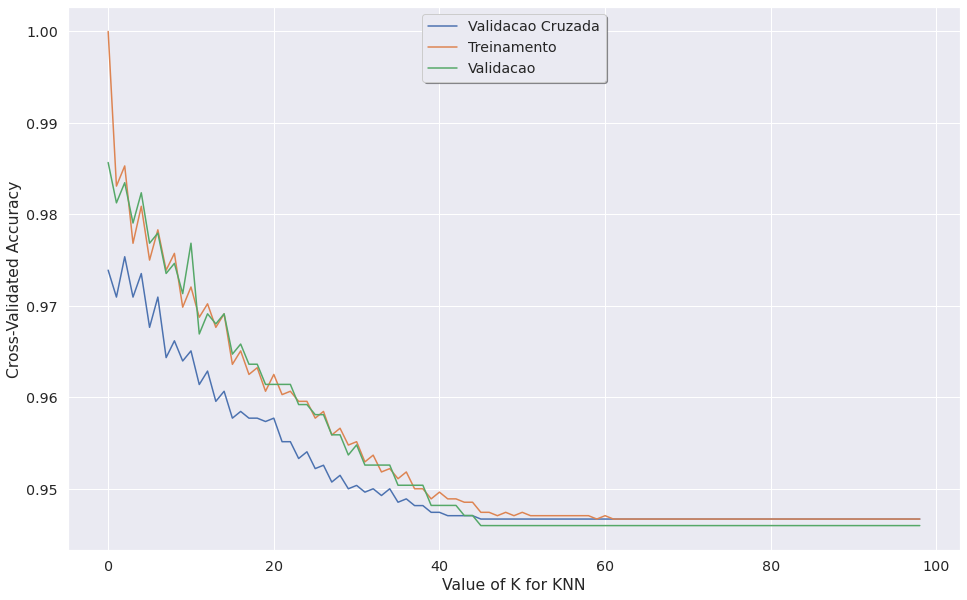

Acuracia de treinamento clf: 0.981
Acuracia de teste clf: 0.979


In [ ]:

k_range = range(1, 100) #k
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []
vet_distancias = ["euclidean", "manhattan"]
#p_range = range(1, 198) #k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
#for k in len(vet_distancias):
for j in k_range:
  knn = neighbors.KNeighborsClassifier(n_neighbors=j)#, metric=vet_distancias[k])
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
  k_scores_train.append(scores.mean())
  knn.fit(X_train, y_train)
  k_scores_train_full.append(knn.score(X_train, y_train))
  k_scores_valid.append(knn.score(X_valid, y_valid))

# plot to see clearly
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Validacao Cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))

In [ ]:
k_scores_train

[0.9738970588235294,
 0.9709558823529412,
 0.9753676470588235,
 0.9709558823529412,
 0.9735294117647058,
 0.9676470588235295,
 0.9709558823529412,
 0.9643382352941176,
 0.9661764705882352,
 0.9639705882352942,
 0.9650735294117647,
 0.9613970588235293,
 0.9628676470588236,
 0.9595588235294118,
 0.9606617647058823,
 0.9577205882352942,
 0.9584558823529411,
 0.9577205882352942,
 0.9577205882352942,
 0.9573529411764706,
 0.9577205882352942,
 0.9551470588235293,
 0.9551470588235293,
 0.9533088235294118,
 0.9540441176470589,
 0.9522058823529411,
 0.9525735294117647,
 0.9507352941176471,
 0.9514705882352941,
 0.95,
 0.9503676470588236,
 0.9496323529411764,
 0.95,
 0.9492647058823529,
 0.95,
 0.9485294117647058,
 0.9488970588235294,
 0.9481617647058822,
 0.9481617647058822,
 0.9474264705882351,
 0.9474264705882351,
 0.9470588235294117,
 0.9470588235294117,
 0.9470588235294117,
 0.9470588235294117,
 0.9466911764705882,
 0.9466911764705882,
 0.9466911764705882,
 0.9466911764705882,
 0.9466911764

# Fazendo o KNN com transformação logaritmica

In [ ]:
#em análise se der tempo

# LVQ

In [ ]:
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from neupy import algorithms
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [16, 10]

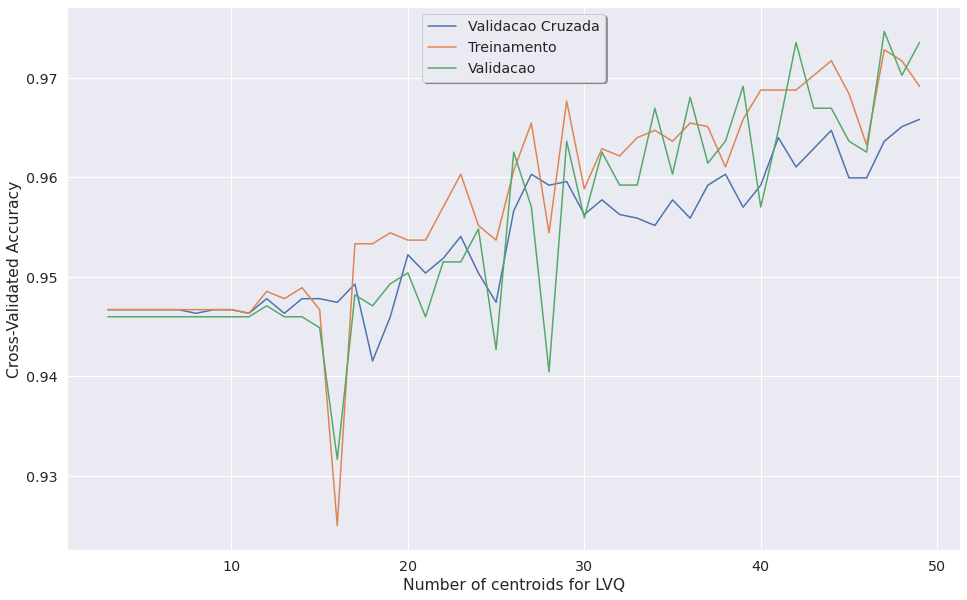

Acuracia de treinamento clf: 0.969
Acuracia de teste clf: 0.963


In [ ]:
# we create an instance of Neighbours Classifier and fit the data.
lvqnet = algorithms.LVQ(n_inputs=7, n_classes=2)

lvqnet.train(X_train, y_train, epochs=20)

p_range = range(3, 50)
p_scores_train = []
p_scores_train_full = []
p_scores_valid = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for p in p_range:
    lvqnet = algorithms.LVQ(n_inputs=7, n_classes=2, n_subclasses=p)
    scores = cross_val_score(lvqnet, X_train, y_train, cv=5, scoring='accuracy')
    p_scores_train.append(scores.mean())
    lvqnet.train(X_train, y_train, epochs=20)
    p_scores_train_full.append(accuracy_score(lvqnet.predict(X_train),y_train))
    p_scores_valid.append(accuracy_score(lvqnet.predict(X_valid), y_valid))

# plot to see clearly
plt.plot(p_range, p_scores_train)
plt.plot(p_range, p_scores_train_full)
plt.plot(p_range, p_scores_valid)
plt.legend(('Validacao Cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Number of centroids for LVQ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  accuracy_score(lvqnet.predict(X_train),y_train))
print("Acuracia de teste clf: %0.3f" %  accuracy_score(lvqnet.predict(X_test), y_test))


# ÁRVORE DE DECISÃO

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 987 kB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=d8c883393dd252c7c54ec11c90f919f0eefae1f406fc0a82f621db81dcdc96f5
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.5.1
    Uninstalling graphviz-0.5.1:
      Successfully uninstalled graphviz-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neupy 0.8.2 requires graphviz==0.5.1, but you have graphviz 0.20.1 which is incompatible.


In [ ]:
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
#criando diferentes arvores
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 10)

tree2 = DecisionTreeClassifier(random_state = 10)

tree1 = tree1.fit(X_train, y_train) #treinamento tree1 

tree2 = tree2.fit(X_train, y_train) #treinamento tree2

print("Acuracia de treinamento da tree1: %0.3f" %  tree1.score(X_train, y_train))
print("Acuracia de validacao da tree1: %0.3f" %  tree1.score(X_valid, y_valid))

print("Acuracia de treinamento da tree2: %0.3f" %  tree2.score(X_train, y_train))
print("Acuracia de validacao da tree2: %0.3f" %  tree2.score(X_valid, y_valid))

print("Profundidade das arvores criadas:")
print(tree1.tree_.max_depth)
print(tree2.tree_.max_depth)

Acuracia de treinamento da tree1: 0.972
Acuracia de validacao da tree1: 0.971
Acuracia de treinamento da tree2: 1.000
Acuracia de validacao da tree2: 0.974
Profundidade das arvores criadas:
3
13


In [ ]:
#feat_names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

feat_names = ['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan', 'class']

In [ ]:
#apresentacao da arvore em texto
text_representation = tree.export_text(tree1,feature_names=feat_names[0:len(feat_names)-1])
print(text_representation)

|--- Mean_Green <= 232.99
|   |--- Mean_Red <= 110.01
|   |   |--- Mean_Green <= 206.74
|   |   |   |--- class: 0.0
|   |   |--- Mean_Green >  206.74
|   |   |   |--- class: 0.0
|   |--- Mean_Red >  110.01
|   |   |--- Mean_Green <= 222.40
|   |   |   |--- class: 1.0
|   |   |--- Mean_Green >  222.40
|   |   |   |--- class: 0.0
|--- Mean_Green >  232.99
|   |--- Mean_Red <= 139.72
|   |   |--- class: 0.0
|   |--- Mean_Red >  139.72
|   |   |--- Mean_Green <= 239.25
|   |   |   |--- class: 0.0
|   |   |--- Mean_Green >  239.25
|   |   |   |--- class: 0.0



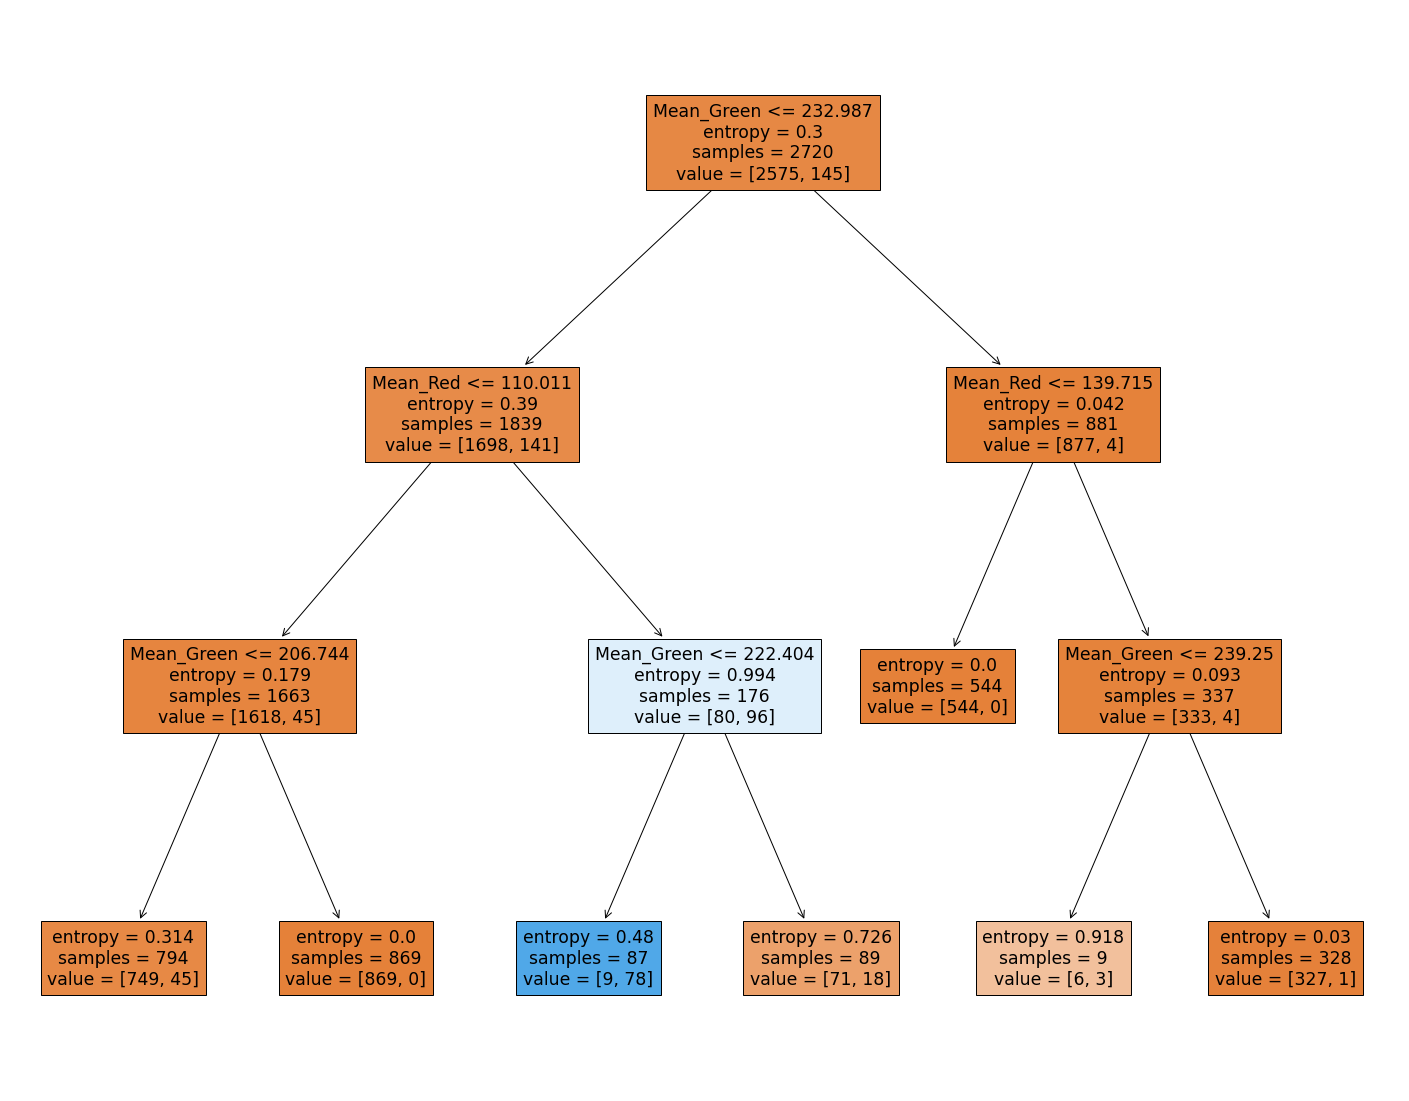

In [ ]:
#apresentacao usando o plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1, 
                   feature_names=feat_names,  
                   #class_names=["healthy","sick"],
                   filled=True)

# SVM

In [ ]:
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
clf = SVC()

clf.fit(X_train, y_train)

kernels_range = ['linear', 'poly', 'rbf', 'sigmoid']
c_range =[0.1,1,10]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []

In [ ]:

# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation


for j in range(3):
  svc = SVC(C=c_range[j], random_state=10, kernel=kernels_range[0])
  scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
  k_scores_cross.append(scores.mean())
  svc.fit(X_train, y_train)
  k_scores_train.append(svc.score(X_train, y_train))
  k_scores_valid.append(svc.score(X_valid, y_valid))


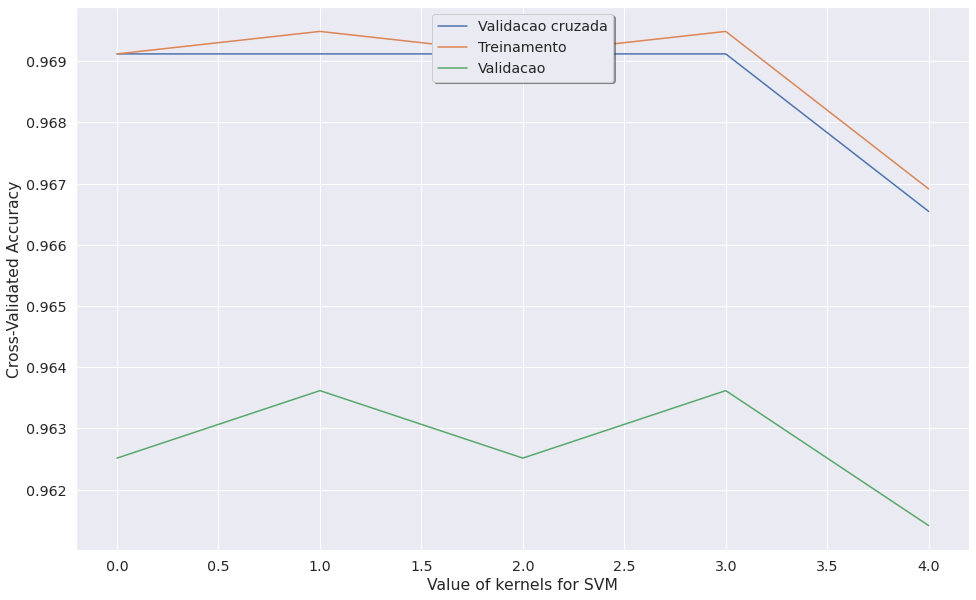

Acuracia de treinamento clf: 0.947
Acuracia de validacao clf: 0.946
Acuracia de teste clf: 0.945


In [ ]:

# plot to see clearly
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of kernels for SVM')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))

# Randon Forrest

In [ ]:
# Random Forest Classification
import pandas
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [ ]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4836
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GLCM_pan    4801 non-null   float64
 1   Mean_Green  4801 non-null   float64
 2   Mean_Red    4801 non-null   float64
 3   Mean_NIR    4801 non-null   float64
 4   SD_pan      4801 non-null   float64
 5   class       4801 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 262.6 KB


,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
0,109.828571,183.700000,82.950000,251.750000,16.079412,0
1,130.284483,212.637931,96.896552,482.396552,21.210295,0
2,131.386555,185.466667,85.466667,419.666667,13.339998,0
3,141.345098,180.875000,81.500000,348.062500,18.213577,0
4,121.383408,218.357143,112.017857,426.607143,19.083196,1


In [ ]:
pd.DataFrame(dataset['class'].value_counts())

,class
0,4547
1,254


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.drop_duplicates(keep=False,inplace=True) 
dataset.duplicated().sum()

0

In [ ]:
pd.DataFrame(dataset['class'].value_counts())

,class
0,4547
1,254


In [ ]:
X=dataset[['GLCM_pan','Mean_Green','Mean_Red','Mean_NIR','SD_pan']]
Y=dataset['class'].values
X.shape,Y.shape

((4801, 5), (4801,))

In [ ]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit(X).transform(X)
X_norm=pd.DataFrame(X)
X_norm.head()

,0,1,2,3,4
0,-1.269677,-0.749525,-0.532301,-1.751098,-0.793416
1,0.251533,-0.291542,-0.306805,-0.280943,-0.306052
2,0.333489,-0.721565,-0.491610,-0.680787,-1.053622
3,1.074058,-0.794234,-0.555746,-1.137196,-0.590699
4,-0.410398,-0.201028,-0.062315,-0.636548,-0.508098


In [ ]:
X_norm.mean(),X_norm.std()

(0    2.160784e-16
 1   -2.959978e-16
 2    1.539189e-16
 3   -2.486382e-16
 4    1.539189e-16
 dtype: float64, 0    1.000104
 1    1.000104
 2    1.000104
 3    1.000104
 4    1.000104
 dtype: float64)

In [ ]:
print(dataset.shape)

(4801, 6)


In [ ]:
#convertendo os valores da base para array
array = dataset.values
X = array[:,0:5]
Y = array[:,5]

array

array([[109.8285714 , 183.7       ,  82.95      , 251.75      ,
         16.0794123 ,   0.        ],
       [130.2844828 , 212.637931  ,  96.89655172, 482.3965517 ,
         21.21029549,   0.        ],
       [131.3865546 , 185.4666667 ,  85.46666667, 419.6666667 ,
         13.33999833,   0.        ],
       ...,
       [132.1238592 , 465.34375   , 295.3333333 , 499.25      ,
         38.76296686,   0.        ],
       [124.4695364 , 215.1526316 ,  98.48421053, 675.9157895 ,
         28.50654248,   0.        ],
       [125.171928  , 559.048     , 365.968     , 439.272     ,
         15.39232155,   0.        ]])

In [ ]:
#semente de numeros aleatorios
seed = 7

num_trees = 100
max_features = 6
#[3 5 10 20 50 100 500]
#divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)

#numero de folds atraves do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10)

#criando o classificador Random Forest
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)

#treinamento do Random Forest em dez folds
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold)

model_rf = model_rf.fit(X_train,y_train)

print("Random Forest folds:", results, "\nMedia treinamento: " ,results.mean())
print("Treinamento: ", model_rf.score(X_train,y_train))
print("Teste: ", model_rf.score(X_test,y_test))

#criando a arvore de decisao
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=seed)

#treinamento da arvores de decisao em dez folds
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold)
clf = clf.fit(X_train,y_train)

print("\nDecision Tree folds", results, "\nMedia treinamento: ",results.mean())
print("Treinamento: ", clf.score(X_train,y_train))
print("Teste: ", clf.score(X_test,y_test))

Random Forest folds: [0.97142857 0.8        0.95714286 0.88571429 0.92857143 0.88571429
 0.8        0.91428571 0.95714286 0.9       ] 
Media treinamento:  0.9
Treinamento:  1.0
Teste:  0.9

Decision Tree folds [0.8        0.74285714 0.85714286 0.75714286 0.82857143 0.74285714
 0.75714286 0.78571429 0.85714286 0.81428571] 
Media treinamento:  0.7942857142857143
Treinamento:  1.0
Teste:  0.8433333333333334


In [ ]:
# Get some classifiers to evaluate with BaggingClassifier
import numpy as np
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)


array = dataset.values
X = array[:,0:5]
Y = array[:,5]

# Create base classifiers
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC(kernel='linear')
rg = RidgeClassifier()

#training ensembles of classifiers
clf_array = [rf, knn, svc, rg]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X, Y, cv=10)
    bagging_clf = BaggingClassifier(clf,max_samples=0.3, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, Y, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',bagging_scores.mean(), 'Desvio ',bagging_scores.std())

Media clf  0.98001386001386 Desvio  0.016917686827880953 Media Bagging 0.9752178620928621 Desvio  0.012218674059298619
Media clf  0.9793845287595287 Desvio  0.010861242536559564 Media Bagging 0.9710511954261956 Desvio  0.010209628455918187
Media clf  0.9517013167013166 Desvio  0.0490833108962172 Media Bagging 0.9521166839916839 Desvio  0.04799239524297262
Media clf  0.9358445945945946 Desvio  0.03418267884815257 Media Bagging 0.9356362612612612 Desvio  0.03480745873748129


In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")



array = dataset.values
X = array[:,0:5]
Y = array[:,5]
seed = 5
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(kernel='linear')
estimators.append(('svm', model3))

#train


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9531583506583508


# Comitê Heterogêneo

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.820 (0.048)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.963 (0.021)


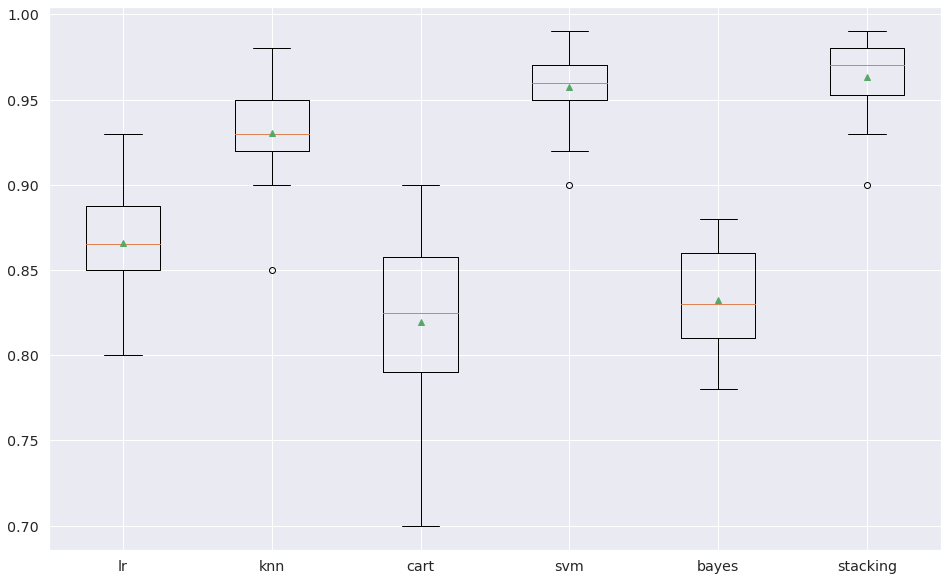

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, Y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, Y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()